In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA


In [2]:
"""
Thought Process:

1) preprocessing by downsampling
2) Vectorization(converting each image from 2D matrix into 1D vector)
3) create data matrix
4) apply PCA
5) calculate eigenfaces
6) reshape eigenfaces and plot 

Sources/Background Research: 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array (researching flattening)
https://www.geeksforgeeks.org/python-array-indexing/ (quick indexing tips)
https://numpy.org/doc/2.1/reference/generated/numpy.matrix.transpose.html
"""

'\nThought Process:\n\n1) preprocessing by downsampling\n2) Vectorization(converting each image from 2D matrix into 1D vector)\n3) create data matrix\n4) apply PCA\n5) calculate eigenfaces\n6) reshape eigenfaces and plot \n\nSources/Background Research: \nhttps://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html\nhttps://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image\nhttps://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array (researching flattening)\nhttps://www.geeksforgeeks.org/python-array-indexing/ (quick indexing tips)\nhttps://numpy.org/doc/2.1/reference/generated/numpy.matrix.transpose.html\n'

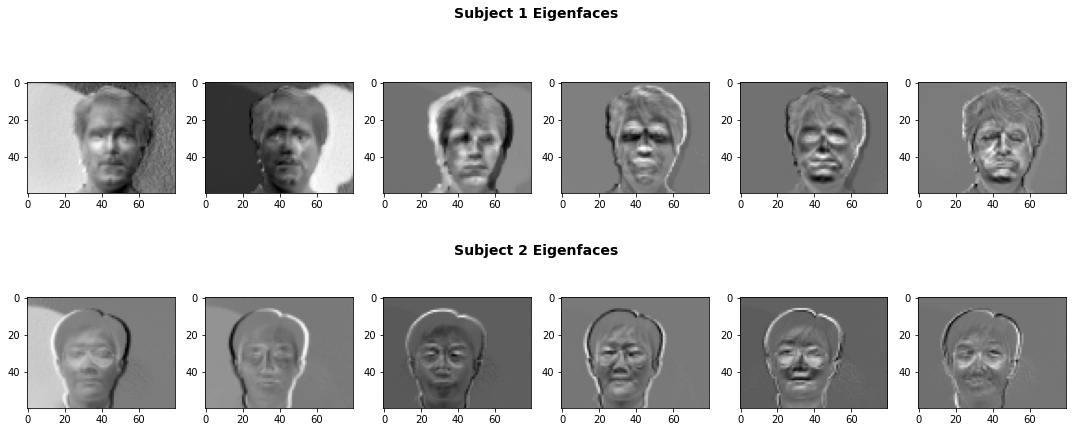

In [3]:
# Initialize empty lists to store images
subject01 = []
subject02 = []

image_dir = "data/yalefaces"

#list to help store all image directories
image_paths = []

# Loop through all files in the directory
for file_name in os.listdir(image_dir):
    
    if file_name.endswith(".gif"):
        #print file_name
        image_paths.append(os.path.join(image_dir, file_name))

for image_path in image_paths:
    
    
    image = Image.open(image_path)

    # Convert image to NumPy array
    image = np.array(image)

    block_size = 4
    height, width = image.shape[:2]
    new_height = height // block_size
    new_width = width // block_size

    cropped_image = image[:new_height * block_size, :new_width * block_size]

    reshaped_image = cropped_image.reshape(new_height, block_size, new_width, block_size)

    # Compute the mean across the (block_size, block_size) regions
    downsampled_image = reshaped_image.mean(axis=(1, 3)).astype(np.uint8)

    flattened_image = downsampled_image.flatten()
    #1D vector^

    if '1' in os.path.basename(image_path):
        subject01.append(flattened_image)
    else:
        subject02.append(flattened_image)
        
        
# Convert lists to NumPy arrays
subject01 = np.array(subject01)
subject02 = np.array(subject02)

test1 = subject01[-1]
test2 = subject02[-1]

# Remove the test images from the training sets
subject01 = subject01[:-1]  
subject02 = subject02[:-1]  



#simple function from PCA package
def compute_pca_faces(X, num_components=6):
   
    pca = PCA(n_components=num_components)
    pca.fit(X)  
    W = pca.components_.T  

    return W

# Compute eigenfaces for both subjects
eigenfaces1 = compute_pca_faces(subject01)  
eigenfaces2 = compute_pca_faces(subject02)  
#print(eigenfaces2)

# 6 figures in each row
#firgure with 2 rows, each subject will be on a row
fig, axes = plt.subplots(2, 6, figsize=(15, 7))


fig.text(0.5, 0.95, "Subject 1 Eigenfaces", ha="center", fontsize=14, fontweight="bold")
fig.text(0.5, 0.48, "Subject 2 Eigenfaces", ha="center", fontsize=14, fontweight="bold")


for idx, face_vector in enumerate(eigenfaces1.T):
    plt.subplot(2, eigenfaces1.shape[1], idx + 1)  
    plt.imshow(face_vector.reshape((60, 80)), cmap='gray')
    

for idx, face_vector in enumerate(eigenfaces2.T):
    plt.subplot(2, eigenfaces2.shape[1], eigenfaces1.shape[1] + idx + 1)
    plt.imshow(face_vector.reshape((60, 80)), cmap='gray')
    

plt.tight_layout()
plt.show()